In [24]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [25]:
# Read csv file into a pandas dataframe
housing_df = pd.read_csv("housing.csv")
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [ ]:
housing_df = housing_df.drop(['longitude', 'latitude'], axis=1)  #dropping irrelevant columns
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  int64  
 1   total_rooms         20640 non-null  int64  
 2   total_bedrooms      20433 non-null  float64
 3   population          20640 non-null  int64  
 4   households          20640 non-null  int64  
 5   median_income       20640 non-null  float64
 6   ocean_proximity     20640 non-null  object 
 7   median_house_value  20640 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [27]:
housing_df.drop_duplicates(inplace=True)

In [28]:
housing_df.isnull().sum()/len(housing_df)   

housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

In [29]:
median = housing_df["total_bedrooms"].median()
housing_df["total_bedrooms"].fillna(median, inplace = True)
housing_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,18,697,150.0,356,114,2.5568,INLAND,77100
20637,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,18,1860,409.0,741,349,1.8672,INLAND,84700


In [30]:
housing_df.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [31]:
housing_df.shape

(20640, 8)

In [32]:
housing_df.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [33]:
def extreme_outliers(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    up = q3 + 3*iqr
    lb = q1 - 3*iqr
    #print(lb,up)
    ext_outliers = df[(df[column]>up) | (df[column]<lb)]
    return ext_outliers

In [34]:
selected_columns = housing_df.select_dtypes(include = ["number"])
for col in selected_columns:
    ext_out = extreme_outliers(housing_df,col)
    if len(ext_out)>0:
        print("Extreme outliers found in",col,"and the count is",len(ext_out))
        housing_df.drop(ext_out.index, inplace = True)
    else:
        print("No extreme outlier found in", col)

No extreme outlier found in housing_median_age
Extreme outliers found in total_rooms and the count is 494
Extreme outliers found in total_bedrooms and the count is 149
Extreme outliers found in population and the count is 110
Extreme outliers found in households and the count is 22
Extreme outliers found in median_income and the count is 137
No extreme outlier found in median_house_value


In [35]:
housing_df.shape

(19728, 8)

In [36]:
# Treating outliers using IQR method
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Defining bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] > upper_bound) | (df[column] < lower_bound)]
   
    return outliers

In [37]:
from scipy.stats import mstats
selected_columns = housing_df.select_dtypes(include="number")
for column in selected_columns:
    if column == "median_house_value":
        continue
    outliers = find_outliers(housing_df, column)
    if len(outliers) > 0:
            housing_df[column] = mstats.winsorize(housing_df[column], limits=[0.05, 0.05]) #capping the top and bottom 5 percentile values

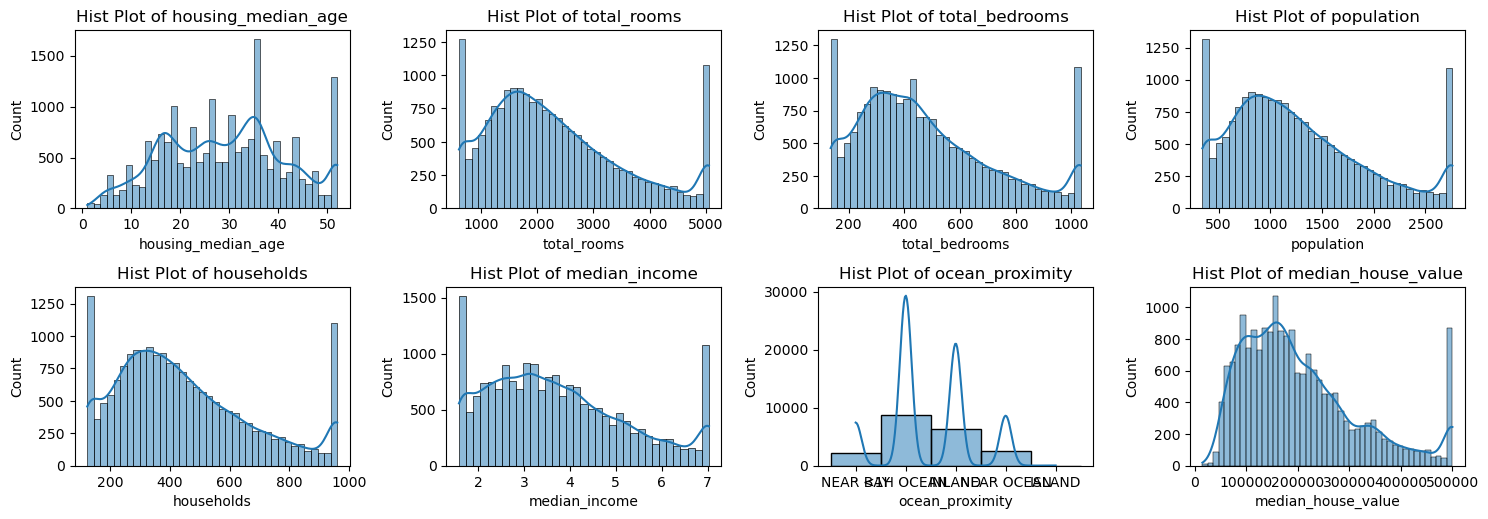

In [38]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(housing_df.columns):
    plt.subplot(4, 4, i + 1) 
    sns.histplot(housing_df[feature],kde = True)
    plt.title(f'Hist Plot of {feature}')
    plt.xlabel(feature)


plt.tight_layout()
plt.show()
    

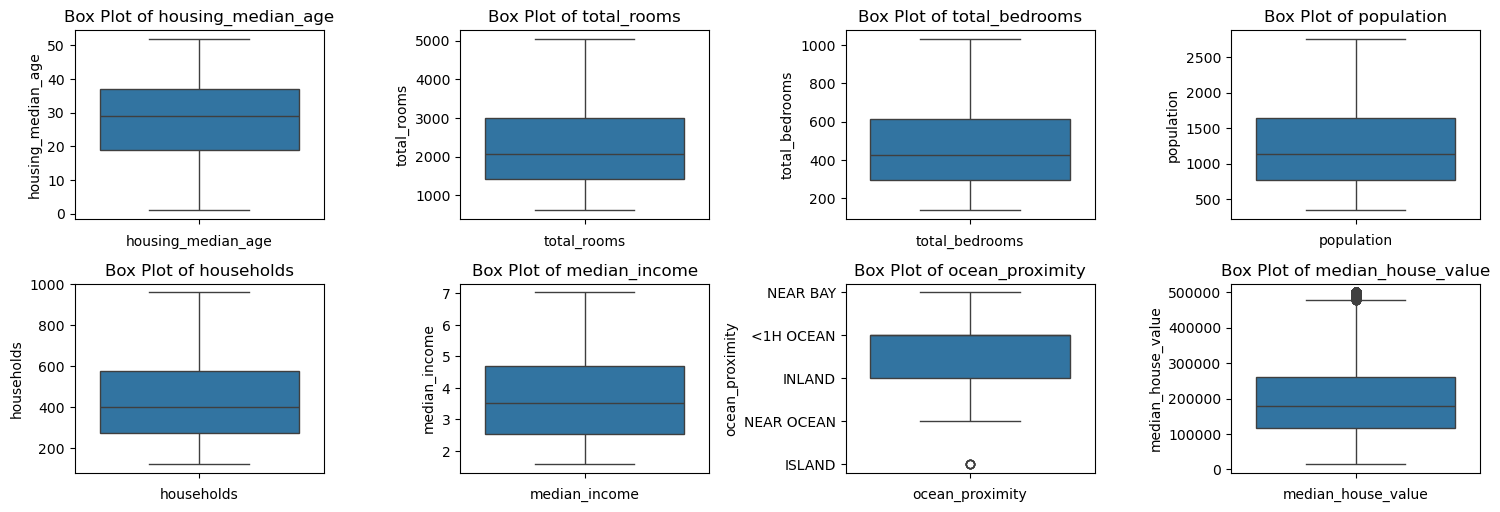

In [39]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(housing_df.columns):
    plt.subplot(4, 4, i + 1) 
    sns.boxplot(housing_df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)


plt.tight_layout()
plt.show()

In [40]:
housing_df = pd.get_dummies(housing_df, columns=["ocean_proximity"], drop_first=True).astype(int)

In [41]:
housing_df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,880,136,342,126,7,452600,0,0,1,0
1,21,5051,1034,2401,961,7,358500,0,0,1,0
2,52,1467,190,496,177,7,352100,0,0,1,0
3,52,1274,235,558,219,5,341300,0,0,1,0
4,52,1627,280,565,259,3,342200,0,0,1,0


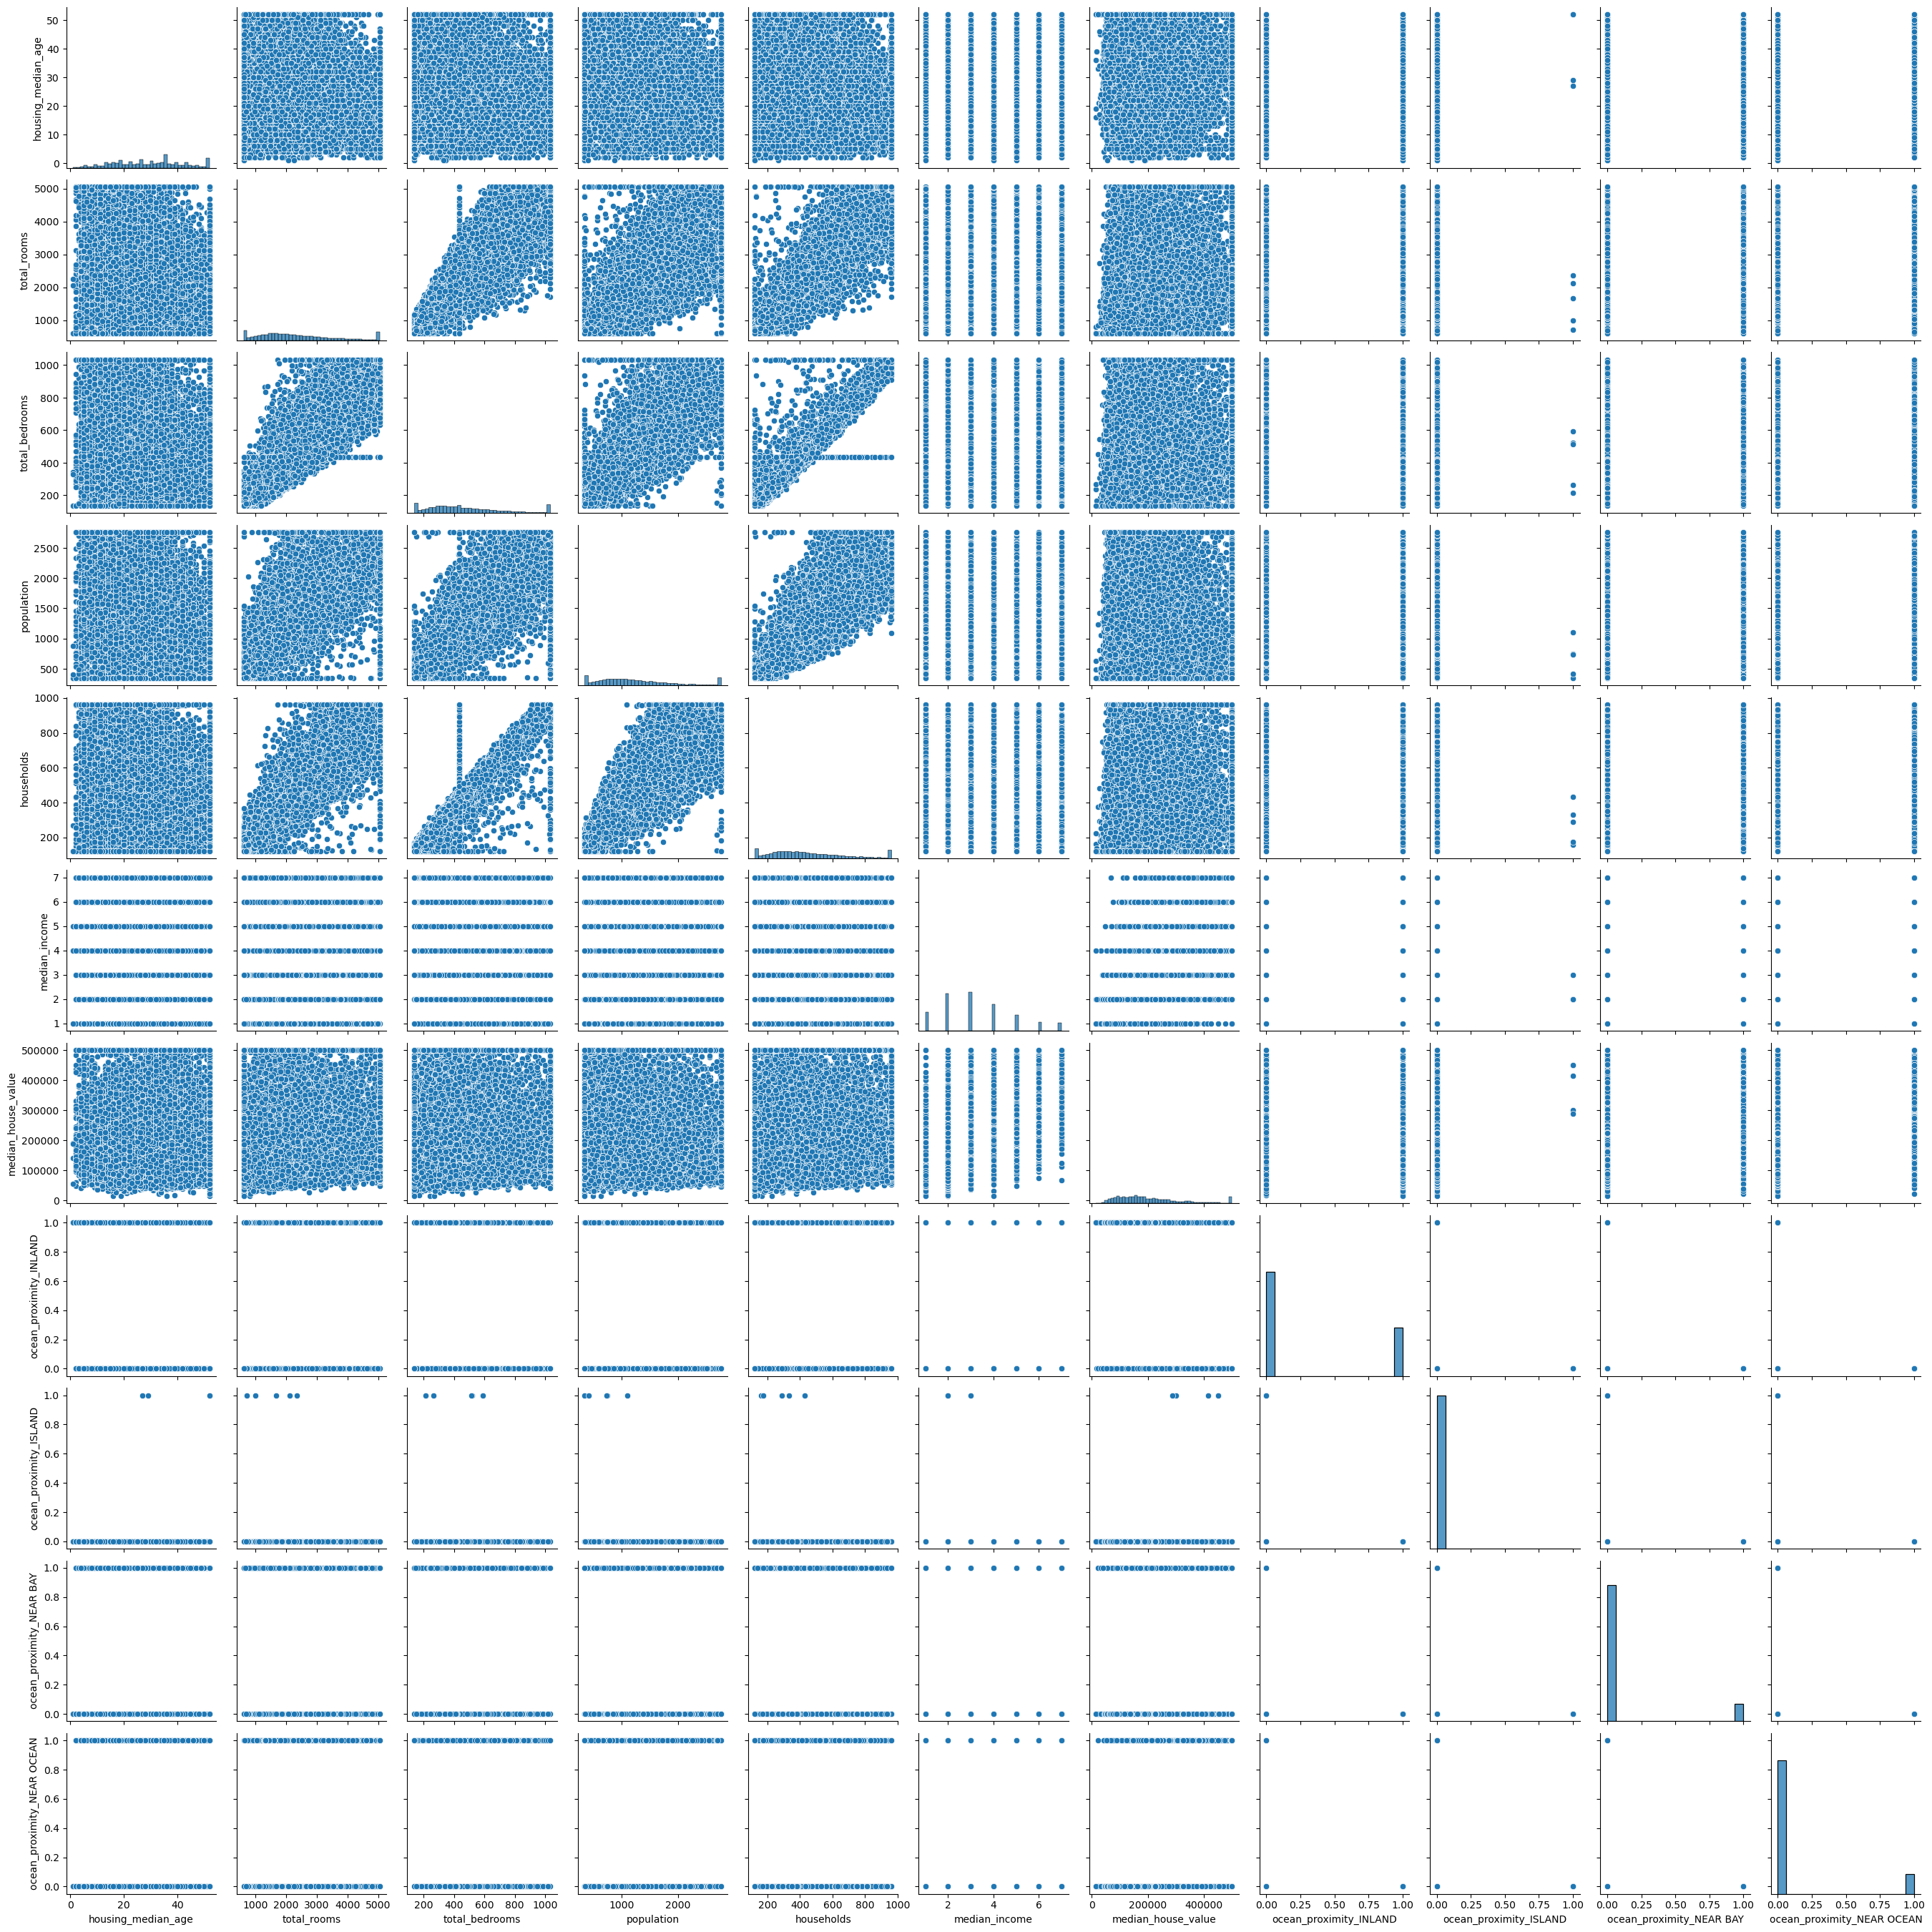

In [42]:
sns.pairplot(data=housing_df)

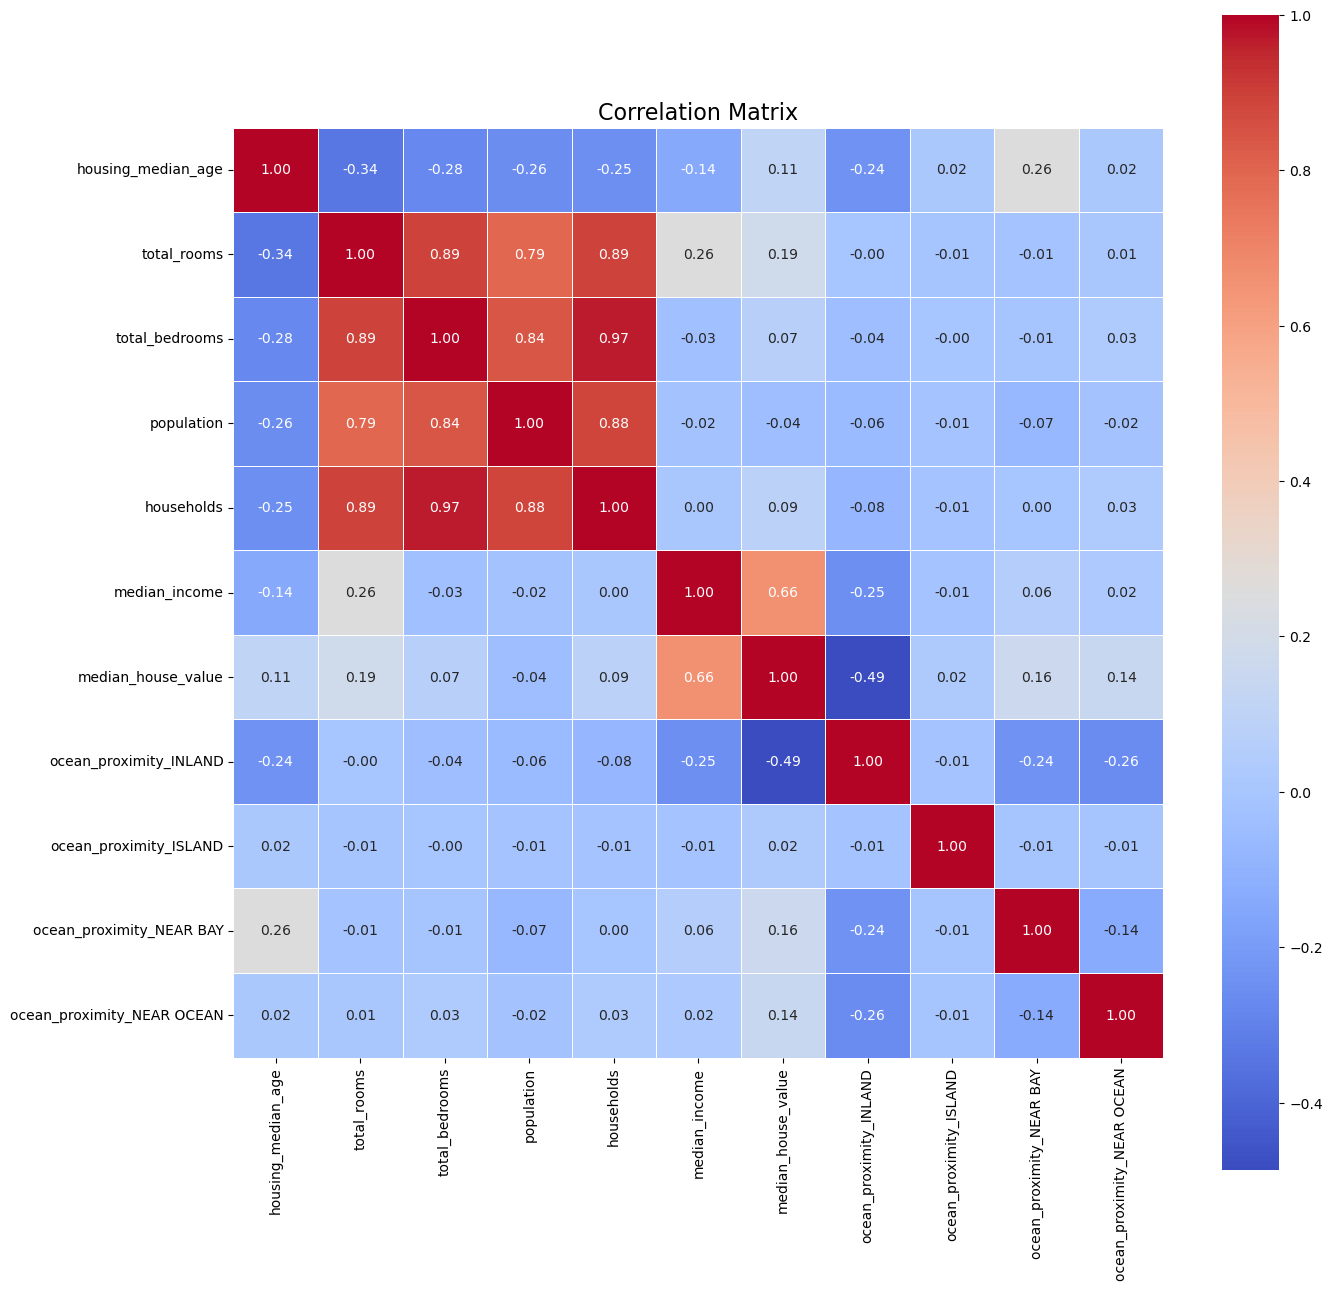

In [43]:
#checking the correlation matrix
correlation_matrix = housing_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar=True)           
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [53]:
X = housing_df.drop(columns=['median_house_value'], axis=1)
y = np.log1p(housing_df['median_house_value'])

<Axes: xlabel='median_house_value', ylabel='Count'>

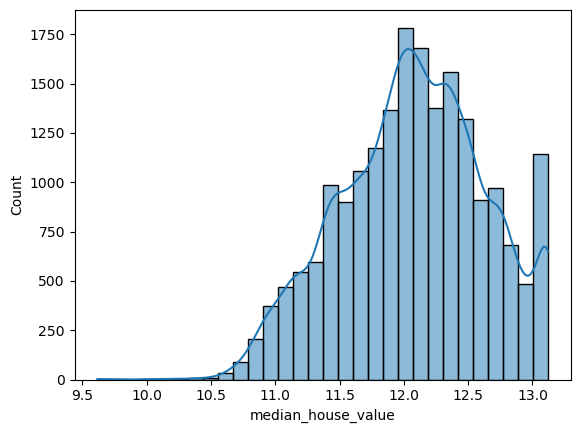

In [65]:
sns.histplot(np.log1p(housing_df['median_house_value']), bins = 30, kde=True)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
X_train = X_train_scaled
X_test = X_test_scaled

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
# Neural Network using TensorFlow
model_nn = Sequential([
    Dense(64, activation='linear', input_dim=X_train.shape[1]),
    Dense(32, activation='linear'),
    Dense(1, activation = 'linear')  # Output layer for regression
])

# Compile the model
model_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 82.3685 - mae: 7.7602 - val_loss: 0.2759 - val_mae: 0.2835
Epoch 2/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1716 - mae: 0.2702 - val_loss: 0.1260 - val_mae: 0.2593
Epoch 3/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1098 - mae: 0.2507 - val_loss: 0.1784 - val_mae: 0.2565
Epoch 4/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1565 - mae: 0.2560 - val_loss: 1.3732 - val_mae: 0.2715
Epoch 5/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9281 - mae: 0.2948 - val_loss: 1.0638 - val_mae: 0.2769
Epoch 6/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4577 - mae: 0.2761 - val_loss: 2.3848 - val_mae: 0.3208
Epoch 7/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8748 - mae: 0.3182 - val_loss: 0.6847 - val_mae: 0.2719
Epoch 8/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5526 - mae: 0.2734 - val_loss: 0.3148 - val_mae: 0.2652
Epoch 9/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - l

In [61]:
models = {
    "Linear Regression": LinearRegression(fit_intercept=True),
    "Ridge Regression": Ridge(alpha=0.1, max_iter= 1000),
    "Lasso Regression": Lasso(alpha=0.1, max_iter= 1000),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

Linear Regression - RMSE: 0.3287, MAE: 0.2499, R2: 0.6718


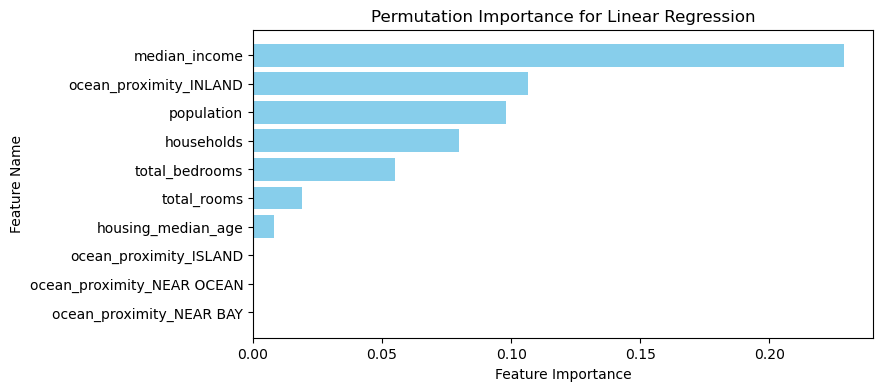

Ridge Regression - RMSE: 0.3287, MAE: 0.2499, R2: 0.6718


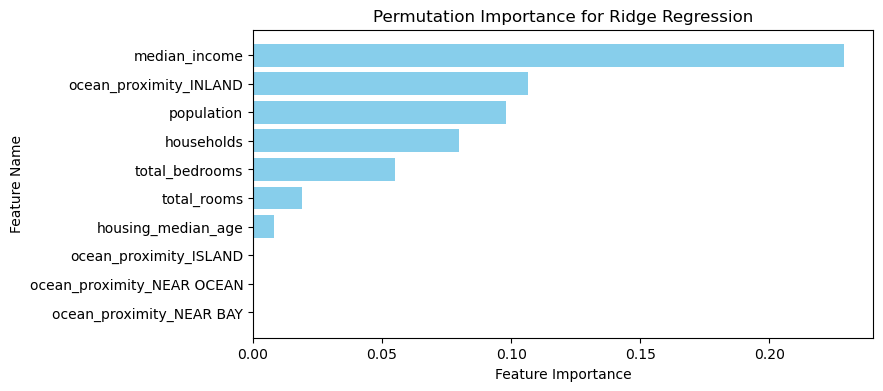

Lasso Regression - RMSE: 0.3781, MAE: 0.2947, R2: 0.5658


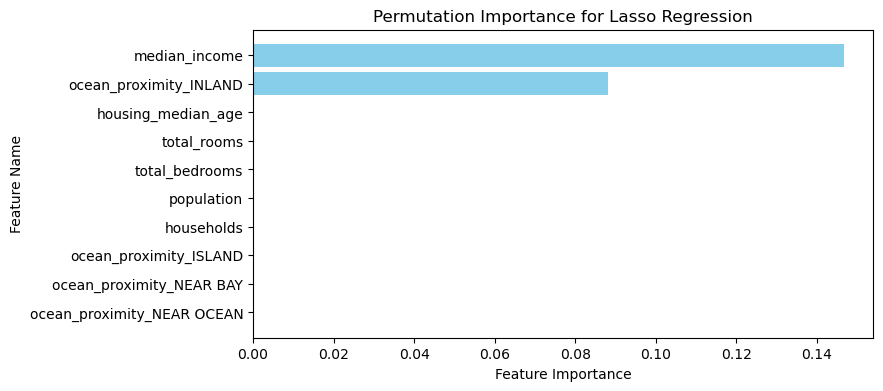

ElasticNet - RMSE: 0.3629, MAE: 0.2822, R2: 0.5998


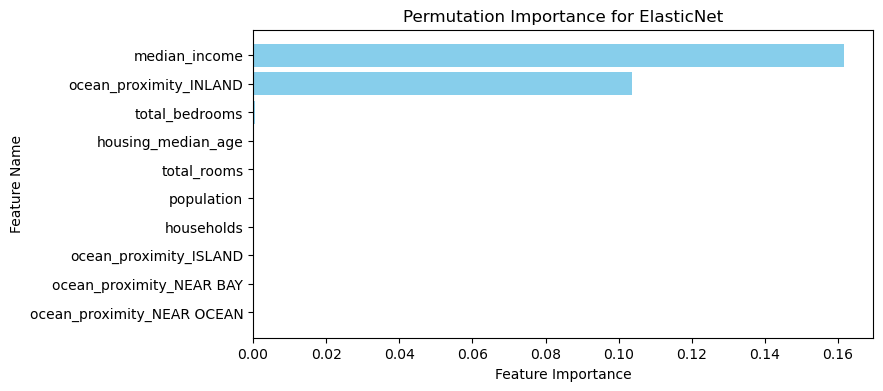

Decision Tree - RMSE: 0.4338, MAE: 0.3226, R2: 0.4284


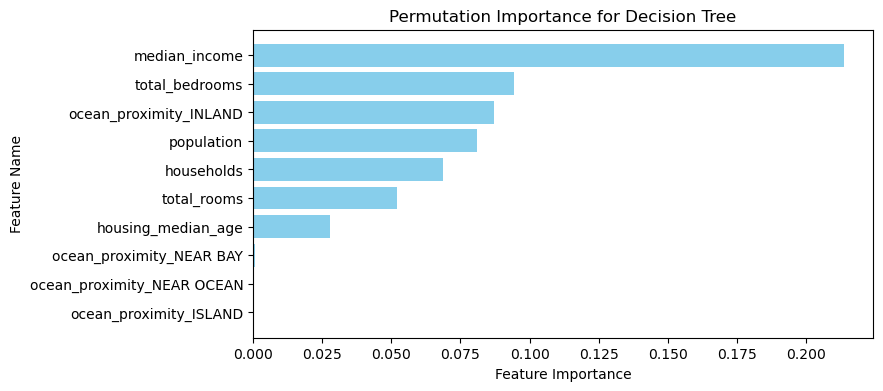

Random Forest - RMSE: 0.3185, MAE: 0.2369, R2: 0.6919


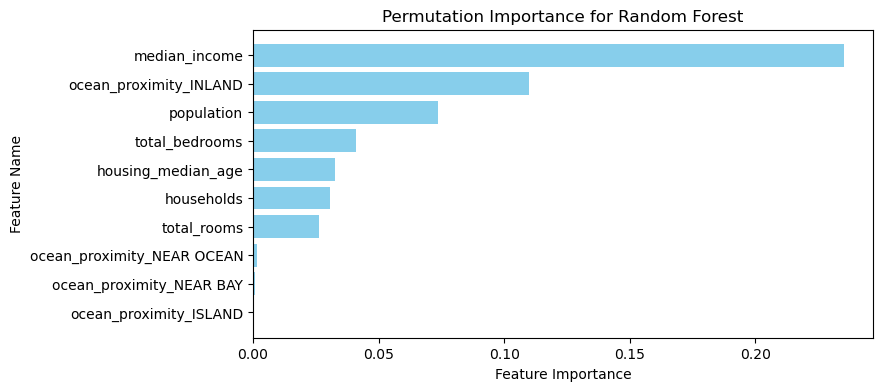

XGBoost - RMSE: 0.3733, MAE: 0.2881, R2: 0.5767


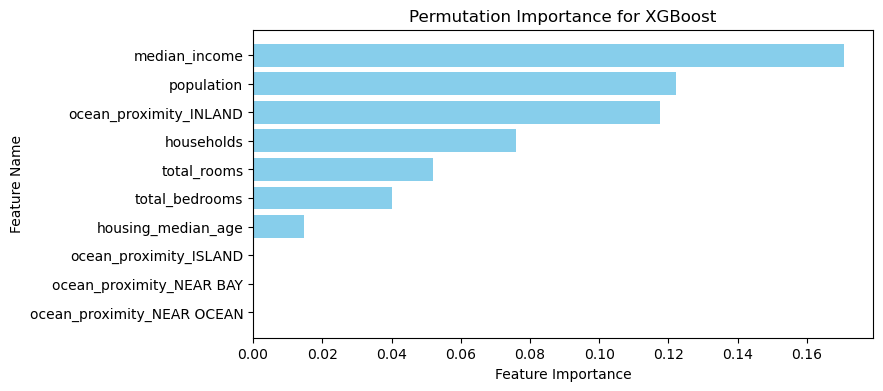

In [62]:
from sklearn.inspection import permutation_importance
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    perm_importance = permutation_importance(model, X_test, y_test, scoring='neg_mean_absolute_error', 
                                             n_repeats=10, random_state=42)
    
    
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns, 
        'Importance': np.abs(perm_importance.importances_mean)  
    }).sort_values(by='Importance', ascending=False)
    
    print(f"{name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
    
    plt.figure(figsize=(8, 4))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Name')
    plt.title(f'Permutation Importance for {name}')
    plt.gca().invert_yaxis() 
    plt.show()
    

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
124/124 ━━━━━━━━━

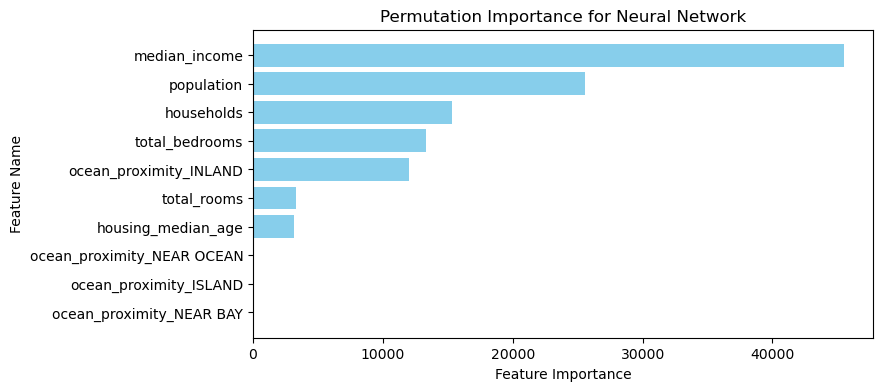

In [52]:
y_pred = model_nn.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
    
perm_importance = permutation_importance(model_nn, X_test, y_test, scoring='neg_mean_absolute_error', 
                                             n_repeats=10, random_state=42)
    
    
feature_importance_df = pd.DataFrame({
        'Feature': X.columns, 
        'Importance': np.abs(perm_importance.importances_mean)  
}).sort_values(by='Importance', ascending=False)
    
print(f"Neural Network - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
    
plt.figure(figsize=(8, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title(f'Permutation Importance for Neural Network')
plt.gca().invert_yaxis() 
plt.show()